In [6]:
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import random
import seaborn as sns
import pandas as pd

In [7]:
def draw(G, pos, measures, measure_name):
    
    nodes = nx.draw_networkx_nodes(G, pos, node_size=250, cmap=plt.cm.plasma, 
                                   node_color=list(measures.values()),
                                   nodelist=measures.keys())
    nodes.set_norm(mcolors.SymLogNorm(linthresh=0.01, linscale=1))
    
    # labels = nx.draw_networkx_labels(G, pos)
    edges = nx.draw_networkx_edges(G, pos)

    plt.title(measure_name)
    plt.colorbar(nodes)
    plt.axis('off')
    plt.show()

In [8]:
#Caricamento del grafo orientato

df_edge = pd.read_csv('twitch\ES\musae_ES_edges.csv')
edges = list(zip(df_edge["from"],df_edge["to"]))

In [9]:
df_target = pd.read_csv('twitch\ES\musae_ES_target.csv')
nodes = df_target['new_id']

In [10]:
graph = nx.DiGraph()
graph.add_edges_from(edges)
graph.add_nodes_from(nodes)
pos = nx.spring_layout(graph)

### Analisi descrittiva

In [13]:
print("NODES: ", len(graph.nodes))
print("EDGES: ", len(graph.edges))
print("DENSITY: ", round(nx.density(graph),3))
print("CLUSTERING: ", nx.average_clustering(graph))
#print("RAGGIO: ", nx.radius(graph))
#print("DIAMETRO: ", nx.diameter(graph))
#print("IS_CONNECTED: ", nx.is_connected(graph))

NODES:  4648
EDGES:  59382
DENSITY:  0.003
CLUSTERING:  0.11124816296232086


In [14]:
nx.clustering(graph)

{0: 0.5,
 1819: 0.00547791869756637,
 2840: 0.05627705627705628,
 1: 0.05555555555555555,
 1565: 0.016223863282686813,
 1309: 0.10588235294117647,
 1397: 0.022629276429672992,
 2677: 0.06920792079207921,
 3497: 0,
 357: 0.05,
 1492: 0,
 4125: 0.09736842105263158,
 1351: 0.010094869669337755,
 2: 0.07142857142857142,
 1437: 0.06060606060606061,
 1728: 0.009257322175732217,
 214: 0.058454106280193235,
 485: 0.023300814319116344,
 2753: 0.031818181818181815,
 676: 0.25,
 3719: 0.006607163103099111,
 3: 0.13949275362318841,
 3830: 0.02544739429695182,
 2504: 0.09096244131455399,
 3387: 0.07809151057683347,
 4528: 0.11575052854122622,
 246: 0.08993506493506494,
 1266: 0.05058275058275058,
 982: 0.013982952249151899,
 596: 0.010694457815859568,
 291: 0.061521132804119284,
 2480: 0.03290610760701219,
 1676: 0.058189947161631214,
 1450: 0.09000584453535944,
 79: 0.05264516129032258,
 2112: 0.010771310298217453,
 222: 0.06437918289881131,
 2558: 0.07296260003266372,
 574: 0.04555542298055125,
 

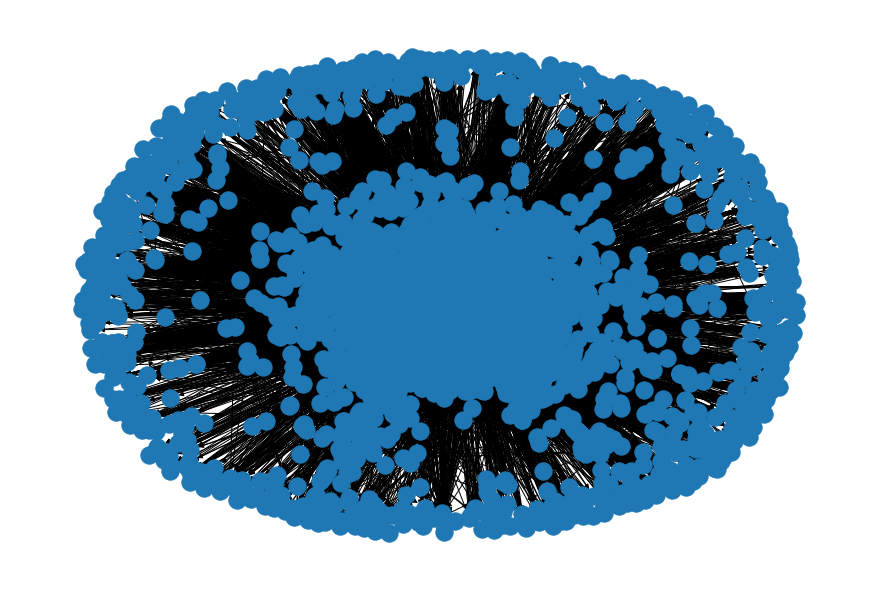

In [15]:
plt.figure(figsize=(12,8))
nx.draw(graph, pos)
plt.show()

### Analisi della centralità

Degree Centrality

In [16]:
deg = nx.degree_centrality(graph)
plt.figure(figsize=(15,10))
sns.barplot(list(deg.keys()), list(deg.values()))

TypeError: barplot() takes from 0 to 1 positional arguments but 2 were given

<Figure size 1080x720 with 0 Axes>

In [ ]:
sns.displot(list(deg.value()))

In [ ]:
plt.figure(figsize=(12,12))
pos = nx.spring_layout(graph)
draw(graph, pos, deg, 'Degree Centrality')

In [ ]:
#cambiare visualizzazione
labels = {} # quale nodo deve avere quale label
for key, value in deg.items():
    if value > 0.2: #faccio vedere solo le labels di nodi più importanti
        labels[key]=key

pos = nx.spring_layout(graph)
nx.draw(graph, pos, with_labels = False) # non metto inizialmente le Labels perchè voglio mettere le mie
nx.draw_networkx_labels(graph, pos, labels)

Betweenness Centrality

In [ ]:
bet = nx.betweenness_centrality(graph)
plt.figure(figsize=(15,10))
sns.barplot(list(bet.keys()), list(bet.values()))

In [ ]:
sns.displot(list(bet.value()))

In [ ]:
plt.figure(figsize=(12,12))
pos = nx.spring_layout(graph)
draw(graph, pos, bet, 'Betweenness Centrality')

In [ ]:
#cambiare visualizzazione
labels = {} # quale nodo deve avere quale label
for key, value in bet.items():
    if value > 0.2: #faccio vedere solo le labels di nodi più importanti
        labels[key]=key

pos = nx.spring_layout(graph)
nx.draw(graph, pos, with_labels = False) # non metto inizialmente le Labels perchè voglio mettere le mie
nx.draw_networkx_labels(graph, pos, labels)

Closeness Centrality

In [ ]:
clos = nx.closeness_centrality(graph)
plt.figure(figsize=(15,10))
sns.barplot(list(clos.keys()), list(clos.values()))

In [ ]:
sns.displot(list(clos.value()))

In [ ]:
plt.figure(figsize=(12,12))
pos = nx.spring_layout(graph)
draw(graph, pos, clos, 'Closeness Centrality')

In [ ]:
#cambiare visualizzazione
labels = {} # quale nodo deve avere quale label
for key, value in clos.items():
    if value > 0.2: #faccio vedere solo le labels di nodi più importanti
        labels[key]=key

pos = nx.spring_layout(graph)
nx.draw(graph, pos, with_labels = False) # non metto inizialmente le Labels perchè voglio mettere le mie
nx.draw_networkx_labels(graph, pos, labels)

Eigenvector Centrality

In [ ]:
eigv = nx.eigenvector_centrality(graph)
plt.figure(figsize=(15,10))
sns.barplot(list(eigv.keys()), list(eigv.values()))

In [ ]:
sns.displot(list(eigv.value()))

In [ ]:
plt.figure(figsize=(12,12))
pos = nx.spring_layout(graph)
draw(graph, pos, eigv, 'Eigenvector Centrality')

In [ ]:
#cambiare visualizzazione
labels = {} # quale nodo deve avere quale label
for key, value in eigv.items():
    if value > 0.2: #faccio vedere solo le labels di nodi più importanti
        labels[key]=key

pos = nx.spring_layout(graph)
nx.draw(graph, pos, with_labels = False) # non metto inizialmente le Labels perchè voglio mettere le mie
nx.draw_networkx_labels(graph, pos, labels)

PageRank

In [ ]:
pager = nx.pagerank(graph, alpha=0.85) #l'alpha è chiamato damping factor
plt.figure(figsize=(15,10))
sns.barplot(list(pager.keys()), list(pager.values()))

In [ ]:
sns.displot(list(pager.value()))

In [ ]:
plt.figure(figsize=(12,12))
pos = nx.spring_layout(graph)
draw(graph, pos, pager, 'PageRank')

In [ ]:
#cambiare visualizzazione
labels = {} # quale nodo deve avere quale label
for key, value in pager.items():
    if value > 0.2: #faccio vedere solo le labels di nodi più importanti
        labels[key]=key

pos = nx.spring_layout(graph)
nx.draw(graph, pos, with_labels = False) # non metto inizialmente le Labels perchè voglio mettere le mie
nx.draw_networkx_labels(graph, pos, labels)

### Analisi delle strutture

Communites

In [ ]:
# BONUS
from networkx.algorithms import community

communities = community.greedy_modularity_communities(graph)
communities

In [ ]:
len(communities)